In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import numpy as np 

In [102]:
store = pd.read_csv('stores.csv')
feature = pd.read_csv('features.csv')
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [103]:
data1 = store.merge(feature, how = 'inner', on = 'Store')
data1.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,A,151315,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,A,151315,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,A,151315,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [104]:
data=data1.merge(train,how='inner',on=['Store','Date','IsHoliday'])
data.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Date          421570 non-null  object 
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     150681 non-null  float64
 7   MarkDown2     111248 non-null  float64
 8   MarkDown3     137091 non-null  float64
 9   MarkDown4     134967 non-null  float64
 10  MarkDown5     151432 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  IsHoliday     421570 non-null  bool   
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [5]:
 data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year
data['Day']=data['Date'].dt.day
data['Week']=data['Date'].dt.week

<ipython-input-6-74ba8d24ccc0>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Week']=data['Date'].dt.week


In [7]:
data['MarkDown1'].fillna(0, inplace = True)
data['MarkDown2'].fillna(0, inplace = True)
data['MarkDown3'].fillna(0, inplace = True)
data['MarkDown4'].fillna(0, inplace = True)
data['MarkDown5'].fillna(0, inplace = True)

In [8]:
data.sort_values(by=['Store','Dept'],ascending=True).reset_index(drop=True)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Month,Year,Day,Week
0,1,A,151315,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,1,24924.50,2,2010,5,5
1,1,A,151315,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,1,46039.49,2,2010,12,6
2,1,A,151315,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,1,41595.55,2,2010,19,7
3,1,A,151315,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,1,19403.54,2,2010,26,8
4,1,A,151315,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,1,21827.90,3,2010,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,2012-09-28,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,98,508.37,9,2012,28,39
421566,45,B,118221,2012-10-05,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,False,98,628.10,10,2012,5,40
421567,45,B,118221,2012-10-12,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,False,98,1061.02,10,2012,12,41
421568,45,B,118221,2012-10-19,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,False,98,760.01,10,2012,19,42


In [9]:
data_1= data[['Date','Weekly_Sales']]

df=data_1.groupby('Date').mean()['Weekly_Sales'].reset_index()

df.set_index('Date',inplace=True)

df

,Weekly_Sales
Date,
2010-02-05,16836.121997
2010-02-12,16352.056032
2010-02-19,16216.658979
2010-02-26,14899.549688
2010-03-05,15921.015727
...,...
2012-09-28,14765.327279
2012-10-05,15983.413747
2012-10-12,15427.596739


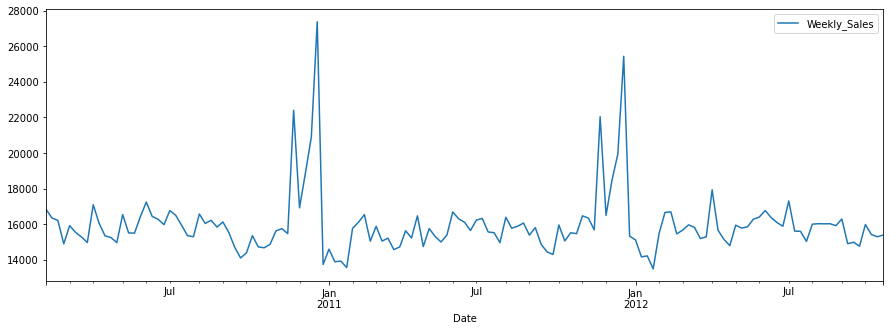

In [10]:
df.plot(figsize=(15,5))
plt.show()

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

import pmdarima as pm

In [13]:
data_1= data[['Date','Weekly_Sales', 'Unemployment']]

In [17]:
df_1= data_1.groupby('Date').mean()['Weekly_Sales'].reset_index()


df_2 = data_1.groupby('Date').mean()['Unemployment'].reset_index()

df_final = df_1.merge(df_2, on = 'Date', how = 'inner')

df_final.set_index('Date',inplace=True)

df_final


,Weekly_Sales,Unemployment
Date,,
2010-02-05,16836.121997,8.576731
2010-02-12,16352.056032,8.567309
2010-02-19,16216.658979,8.576351
2010-02-26,14899.549688,8.561375
2010-03-05,15921.015727,8.572689
...,...,...
2012-09-28,14765.327279,7.225855
2012-10-05,15983.413747,6.942141
2012-10-12,15427.596739,6.952682


In [18]:
result_mul = seasonal_decompose(df_final['Weekly_Sales'],  
                                model='multiplicative', 
                                extrapolate_trend='freq')

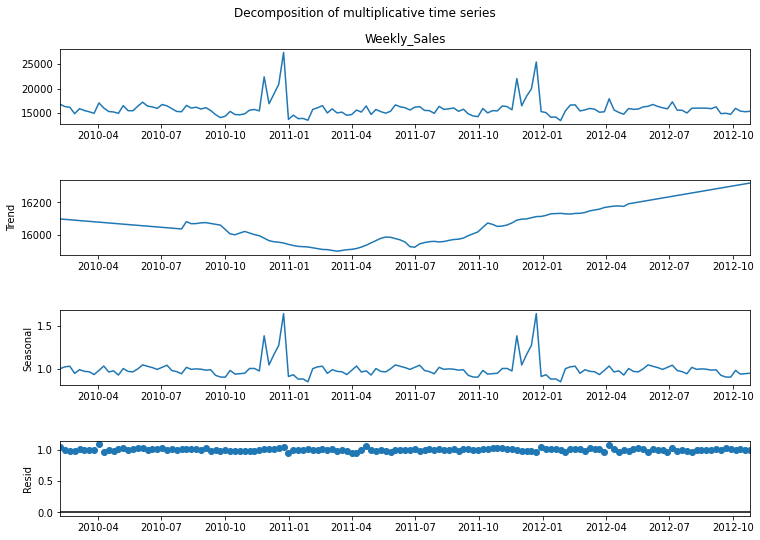

In [114]:
fig = result_mul.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [112]:
seasonal_index = result_mul.seasonal.to_frame()
seasonal_index
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

In [113]:
df_final['month'] = df_final.index.month
df = pd.merge(df_final, seasonal_index, how='inner',left_index=True,right_index=True)
df

,Weekly_Sales,Unemployment,month_x,seasonal,month_y
Date,,,,,
2010-02-05,16836.121997,8.576731,2,0.998256,2
2010-02-12,16352.056032,8.567309,2,1.019937,2
2010-02-19,16216.658979,8.576351,2,1.026838,2
2010-02-26,14899.549688,8.561375,2,0.942864,2
2010-03-05,15921.015727,8.572689,3,0.985938,3
...,...,...,...,...,...
2012-09-28,14765.327279,7.225855,9,0.898296,9
2012-10-05,15983.413747,6.942141,10,0.977786,10
2012-10-12,15427.596739,6.952682,10,0.934051,10


In [ ]:
df = df[['Weekly_Sales','month_x','seasonal']]
# df.columns = ['value', 'month', 'seasonal_index']
df.index = df_final.index  # reassigning the index 

In [21]:
df

,Weekly_Sales,month_x,seasonal
Date,,,
2010-02-05,16836.121997,2,0.998256
2010-02-12,16352.056032,2,1.019937
2010-02-19,16216.658979,2,1.026838
2010-02-26,14899.549688,2,0.942864
2010-03-05,15921.015727,3,0.985938
...,...,...,...
2012-09-28,14765.327279,9,0.898296
2012-10-05,15983.413747,10,0.977786
2012-10-12,15427.596739,10,0.934051


In [22]:
train = df[:105]
test = df[105:]

In [23]:
sxmodel = pm.auto_arima(train[['Weekly_Sales']], exogenous=train[['seasonal']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1394.237, Time=0.73 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1415.781, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1402.017, Time=0.48 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1392.356, Time=0.47 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1414.149, Time=0.14 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1415.991, Time=0.09 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=1394.306, Time=1.02 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1394.294, Time=0.93 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1402.294, Time=0.64 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=1396.028, Time=2.29 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1391.889, Time=0.75 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1394.568, Time=0.51 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1393.850, Time=1.45 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1403.319, Time=0.32 sec
 ARIMA(0,0,0)(1,1,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  105
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -690.752
Date:                              Tue, 22 Mar 2022   AIC                           1391.505
Time:                                      18:12:26   BIC                           1404.168
Sample:                                  02-05-2010   HQIC                          1396.618
                                       - 02-03-2012                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -22.5942     21.130     -1.069      0.285     -64.009      18.821
seasonal    1.628e+04    205.375     79.282      0.000    1.59e+04    1.67e+04
ar.L1          0.1634      0.089      1.835      0.066      -0.011       0.338
ma.S.L12      -0.7022      0.142     -4.936      0.000      -0.981      -0.423
sigma2      1.571e+05    2.3e+04      6.845      0.000    1.12e+05    2.02e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.96   Prob(JB):                         0.94
Heteroskedasticity (H):               0.71   Skew:                             0.01
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

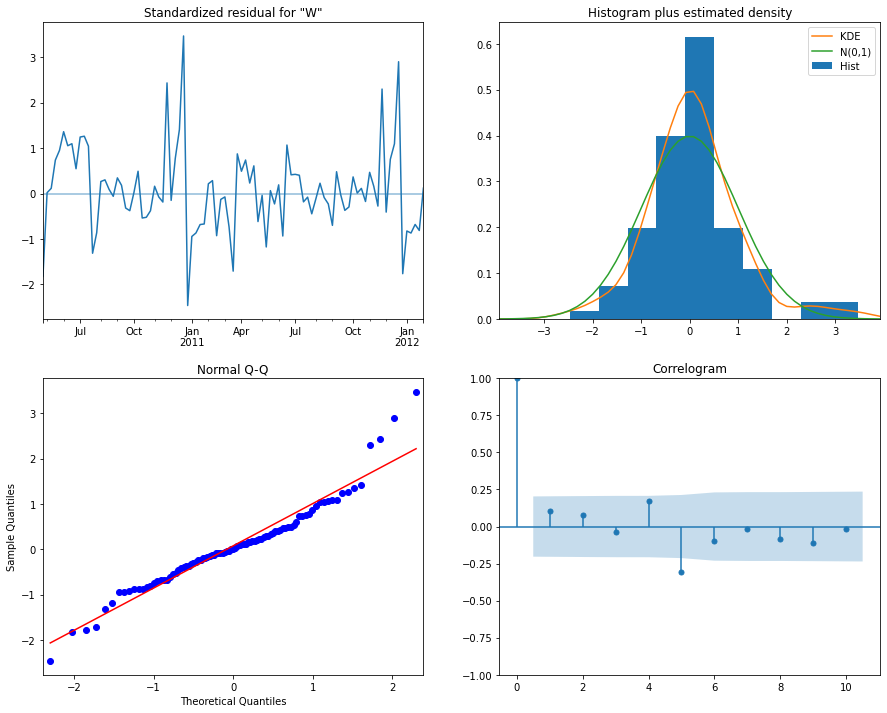

In [115]:
model.plot_diagnostics(figsize=(15,12));

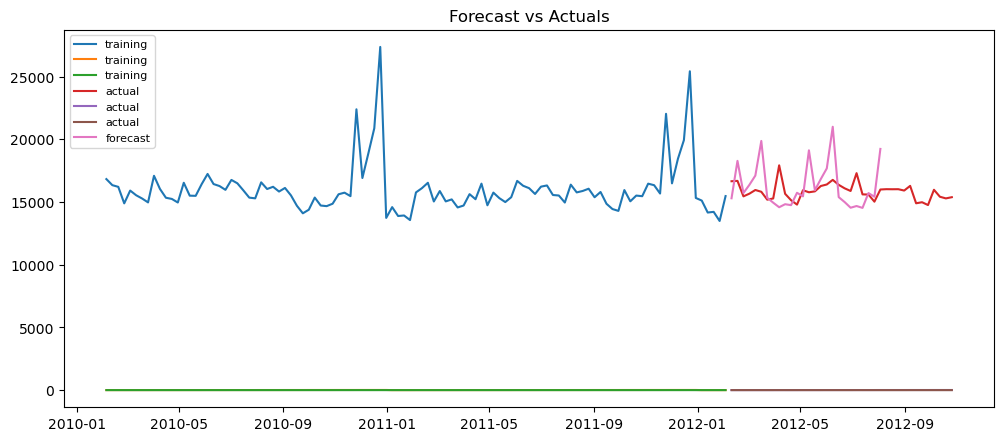

In [26]:
# n_periods = 36
# fitted= model.predict(n_periods=n_periods, exogenous=np.tile(seasonal_index.seasonal, 2).reshape(-1,1), 
#                                   return_conf_int=True)

# index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# # make series for plotting purpose
# fitted_series = pd.Series(fitted, index=index_of_fc)
# # lower_series = pd.Series(confint[:, 0], index=index_of_fc)
# # upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# # Plot
# # plt.plot(df['Weekly_Sales'])
# # plt.plot(fitted_series, color='darkgreen')
# # # plt.fill_between(lower_series.index, 
# # #                  lower_series, 
# # #                  upper_series, 
# # #                  color='k', alpha=.15)

# # # plt.title("SARIMAX Forecast of a10 - Drug Sales")
# # # plt.show()
# # plt.figure(figsize=(12,5), dpi=100)
# # plt.plot(train, label='training')
# # plt.plot(test, label='actual')
# # plt.plot(fc_series, label='forecast')
# # # plt.fill_between(lower_series.index, lower_series, upper_series, 
# # #                  color='k', alpha=.15)
# # plt.title('Forecast vs Actuals')
# # plt.legend(loc='upper left', fontsize=8)
# # plt.show()


# # # Forecast
# # fc = model.forecast(26, alpha=0.05)  # 95% conf

# # # Make as pandas series
# # fc_series = pd.Series(fc, index=test.index)
# # lower_series = pd.Series(conf[:, 0], index=test.index)
# # upper_series = pd.Series(conf[:, 1], index=test.index)


# plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train, label='training')
# plt.plot(test, label='actual')
# plt.plot(fc_series, label='forecast')
# # plt.fill_between(lower_series.index, lower_series, upper_series, 
# #                  color='k', alpha=.15)
# plt.title('Forecast vs Actuals')
# plt.legend(loc='upper left', fontsize=8)
# plt.show()


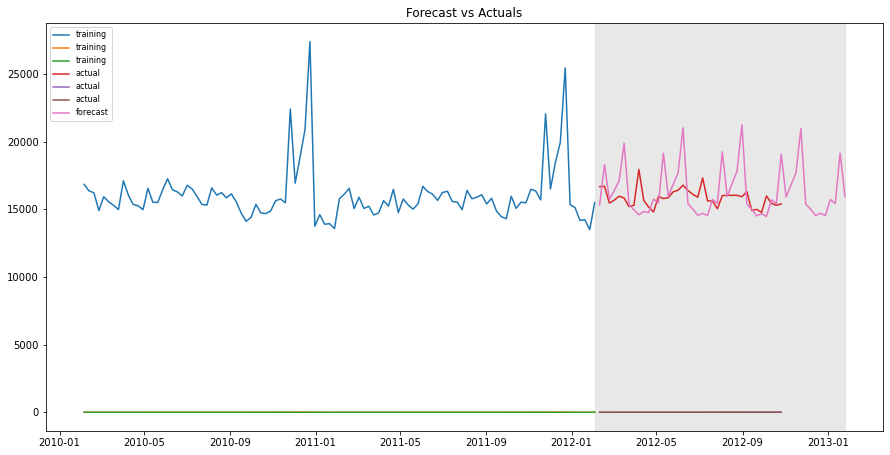

In [91]:
# n_periods = 
# forecast = model.predict(n_periods=n_periods, exogenous=np.tile(seasonal_index.seasonal, 2).reshape(-1,1), 
#                                   return_conf_int=True)
forecast = model.predict(start=train.shape[0], end=train.shape[0] + 50, exogenous=np.tile(seasonal_index.seasonal, 2).reshape(-1,1), 
                                  return_conf_int=True)
# forecast = train['sarima_model'].append(forecast)

plt.figure(figsize=(15, 7.5))
# plt.plot(forecast, color='r', label='model')
plt.axvspan(train.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
# plt.plot(train, label='training', color='b')
# plt.plot(test, label='actual', color ='r')
# plt.plot(forecast, label='forecast', color = 'g')
# plt.legend

plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(forecast, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [99]:
fc = np.array(forecast)
true = fc[0:38]
pred =  test.values[:,0]


In [101]:
def RMSPE(y_true, y_pred):
    res =  np.sqrt(np.nanmean(np.square(((y_true - y_pred) / y_true))))*100
    print("RMPSE :  ", res) 
RMSPE (true, pred)




RMPSE :   10.462740707486066
